# Imported Library

Please import all necessary library that will be needed in this kernel here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Imported Dataset

Please import your dataset in pandas dataframe form. You can find the dataset in '../data/' directory. Don't forget to display the 5 top and size of dataset to give us initial idea about what kind dataset that we're going to analyze.

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data_cla = pd.read_csv("Data/UCI_Credit_Card.csv")
data_cla.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<hr>

# Domain Knowledge Analysis (optional)

Please state your domain knowledge to make a hypothesis (unproved) related to this case. To do this task, you are demanded to learn a little bit about study field which is related to this case.

<hr>

# Exploratory Data Analysis

Please do mind that what you will analyze in this section must be correlated or make sense to your model performance.

## Null value analysis

Please analyze how much null value that was contained in our dataset. You can choose your prefered method for null value handling but in default, you can choose one of three methods below:
1. fill them with median value,
2. drop rows that contain null value, or
3. drop columns that contain null value

You can review what you learned first to choose the best method for our dataset.

In [4]:
# Null value composition
data_cla.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Null value handling

## Irregular value analysis

1. Please analyze if there are some irregular value that was contained in our dataset. 
2. Please refer to "Feature Explanations" to know the meaning of each features so you can identify if there is irregular value in one or more features. 
3. Value is irregular if it's different from valid distinct value set in a specific feature
4. Outlier is also considered to be irregular
5. Please explain the method that you use for irregular value handling.
6. Please seperate each cell for irregular value handling in each feature

<div style='color:red;font-weight:bold'>NB: You can skip this step if you feel there are no irregular values in our dataset</div>

In [6]:
def rmvOutlier(df,colName):
    q1 = df[colName].quantile(0.25)
    q3 = df[colName].quantile(0.75)
    interq = q3-q1
    fenceLow = q1-1.5*interq
    fenceHigh = q3+1.5*interq
    df_out =  df.loc[(df[colName] > fenceLow) & (df[colName] < fenceHigh)]
    return df_out

In [7]:
# Irregular value handling feature 1
data_cla = rmvOutlier(data_cla, 'LIMIT_BAL')
data_cla.shape

(29833, 25)

In [8]:
# Irregular value handling feature 2
for i in range(6):
    data_cla = rmvOutlier(data_cla, 'BILL_AMT'+str(i+1))
data_cla.shape

(22944, 25)

In [9]:
# Irregular value handling feature 3
for i in range(6):
    data_cla = rmvOutlier(data_cla, 'PAY_AMT'+str(i+1))
data_cla.shape

(14487, 25)

In [10]:
data_cla = data_cla.reset_index(drop=True)

## Data type analysis

It's important to make sure that each feature already use correct data type. Please make sure all features already use correct data type based on whether the feature is categorical or numerical. Please change:
1. categorical feature into 'int64', and
2. numerical feature into 'float64'

In [11]:
# Data type display
data_cla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14487 entries, 0 to 14486
Data columns (total 25 columns):
ID                            14487 non-null int64
LIMIT_BAL                     14487 non-null float64
SEX                           14487 non-null int64
EDUCATION                     14487 non-null int64
MARRIAGE                      14487 non-null int64
AGE                           14487 non-null int64
PAY_0                         14487 non-null int64
PAY_2                         14487 non-null int64
PAY_3                         14487 non-null int64
PAY_4                         14487 non-null int64
PAY_5                         14487 non-null int64
PAY_6                         14487 non-null int64
BILL_AMT1                     14487 non-null float64
BILL_AMT2                     14487 non-null float64
BILL_AMT3                     14487 non-null float64
BILL_AMT4                     14487 non-null float64
BILL_AMT5                     14487 non-null float64
BILL_AMT6   

In [12]:
# Data type handling

## Feature correlation analysis

The purpose of this section to find if there are possibility of multi-correlation between features and in the same time to get insight about which features (X) that have good correlation with our target (y).

### Heatmap correlation

Heatmap is one of simplest method to analyze feature correlation. Please do:
1. make heatmap correlation with only features (X) - we need to know correlation between features and avoid multi-correlation features,
2. make heatmap correlation with features (X) and target (y) - we need to know which features that have good correlation with our target,

You can select some good features only (highlighting) to make the plots clearer.

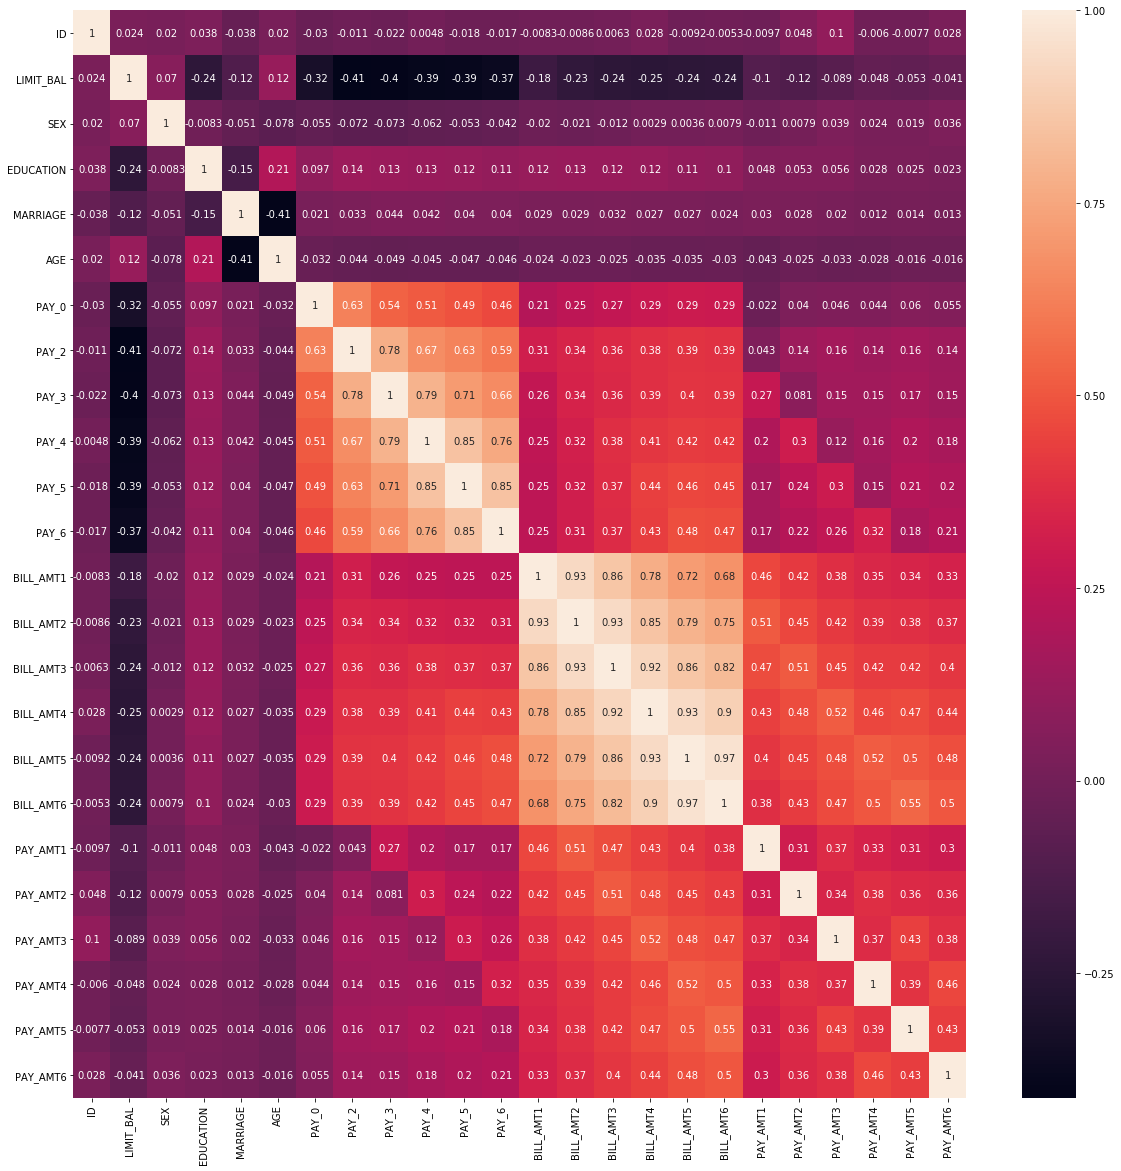

In [13]:
# Heatmap correlation with only features (X)
df_corr_y = data_cla.copy()
df_corr_y = df_corr_y.drop(["default.payment.next.month"],axis=1)
plt.figure(figsize = (20,20))
sns.heatmap(df_corr_y.corr(), annot=True)
plt.show()

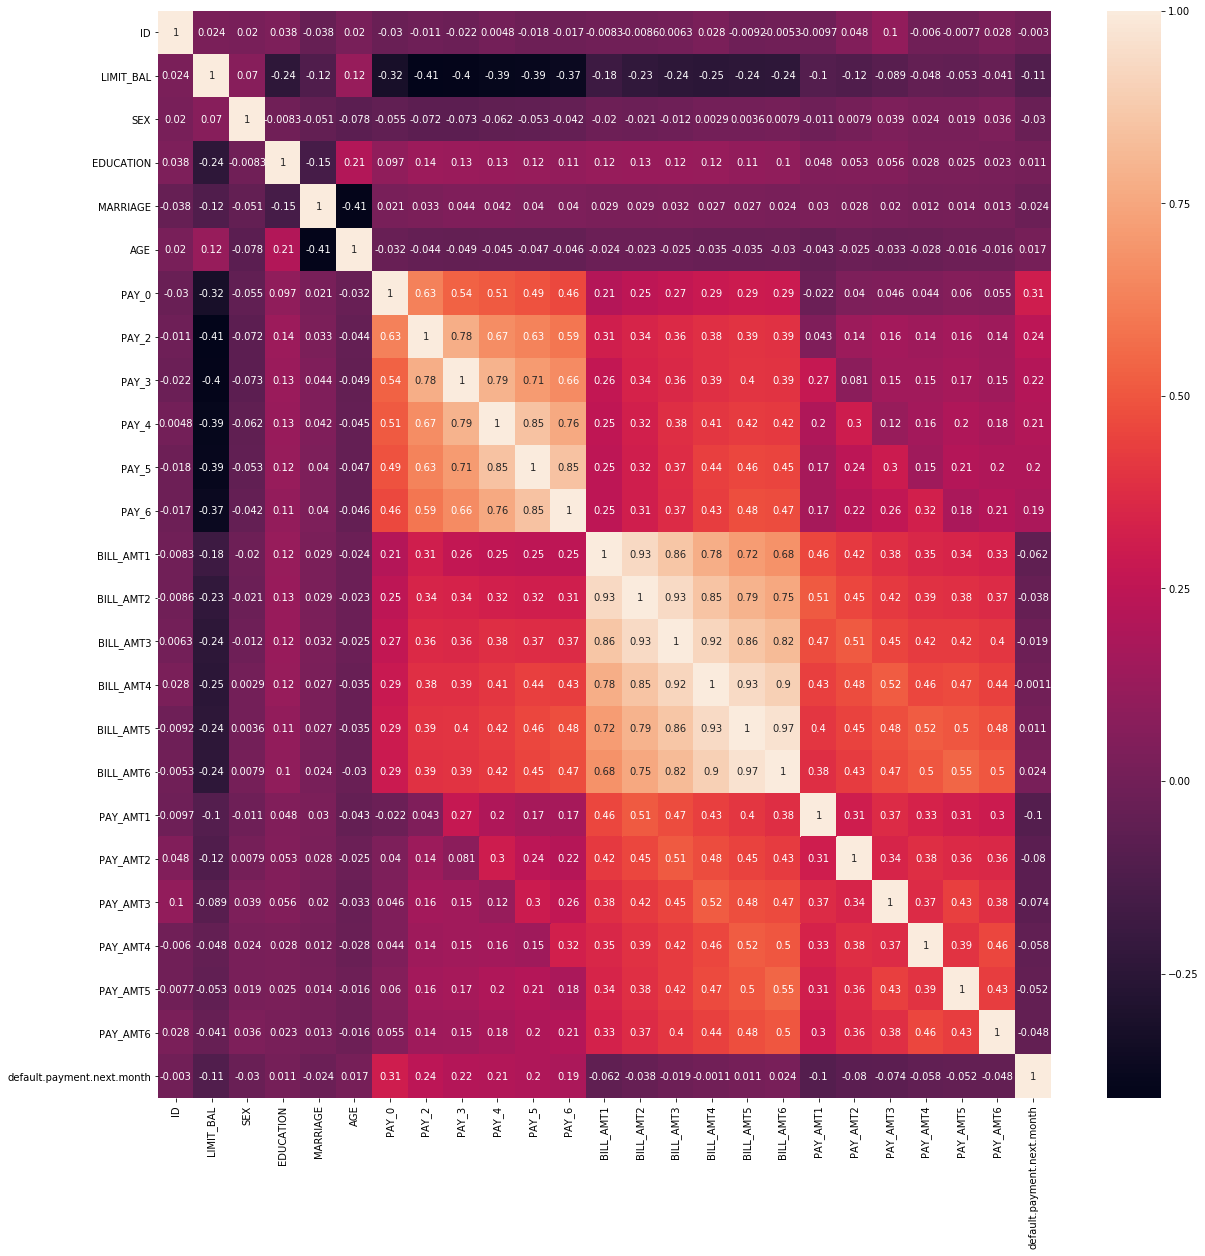

In [14]:
# Heatmap correlation with features (X) and target (y)
plt.figure(figsize = (20,20))
sns.heatmap(data_cla.corr(), annot=True)
plt.show()

## Distribution analysis

Please make:
1. distribution plot for each numerical feature - we need to know how is distribution shape for each numerical feature
2. histogram for each categorical feature - we need to know how is distribution for each distinct value in each feature

<div style='color:red'>
    <b>
        NB: Please do: <br>
        1. separate each feature's plot, and <br>
        2. give good title and good axis title for each plot
    </b>
</div>

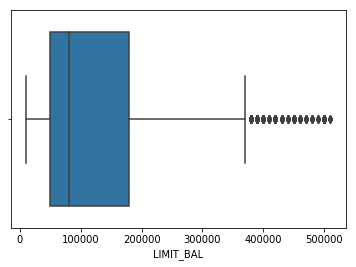

In [15]:
# Distribution analysis feature 1
sns.boxplot(data_cla['LIMIT_BAL'])
plt.show()

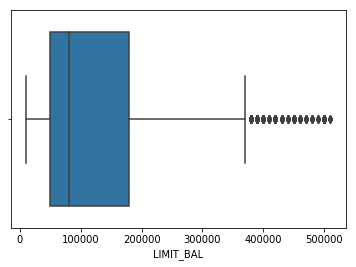

In [16]:
# Distribution analysis feature 2
sns.boxplot(data_cla['LIMIT_BAL'])
plt.show()

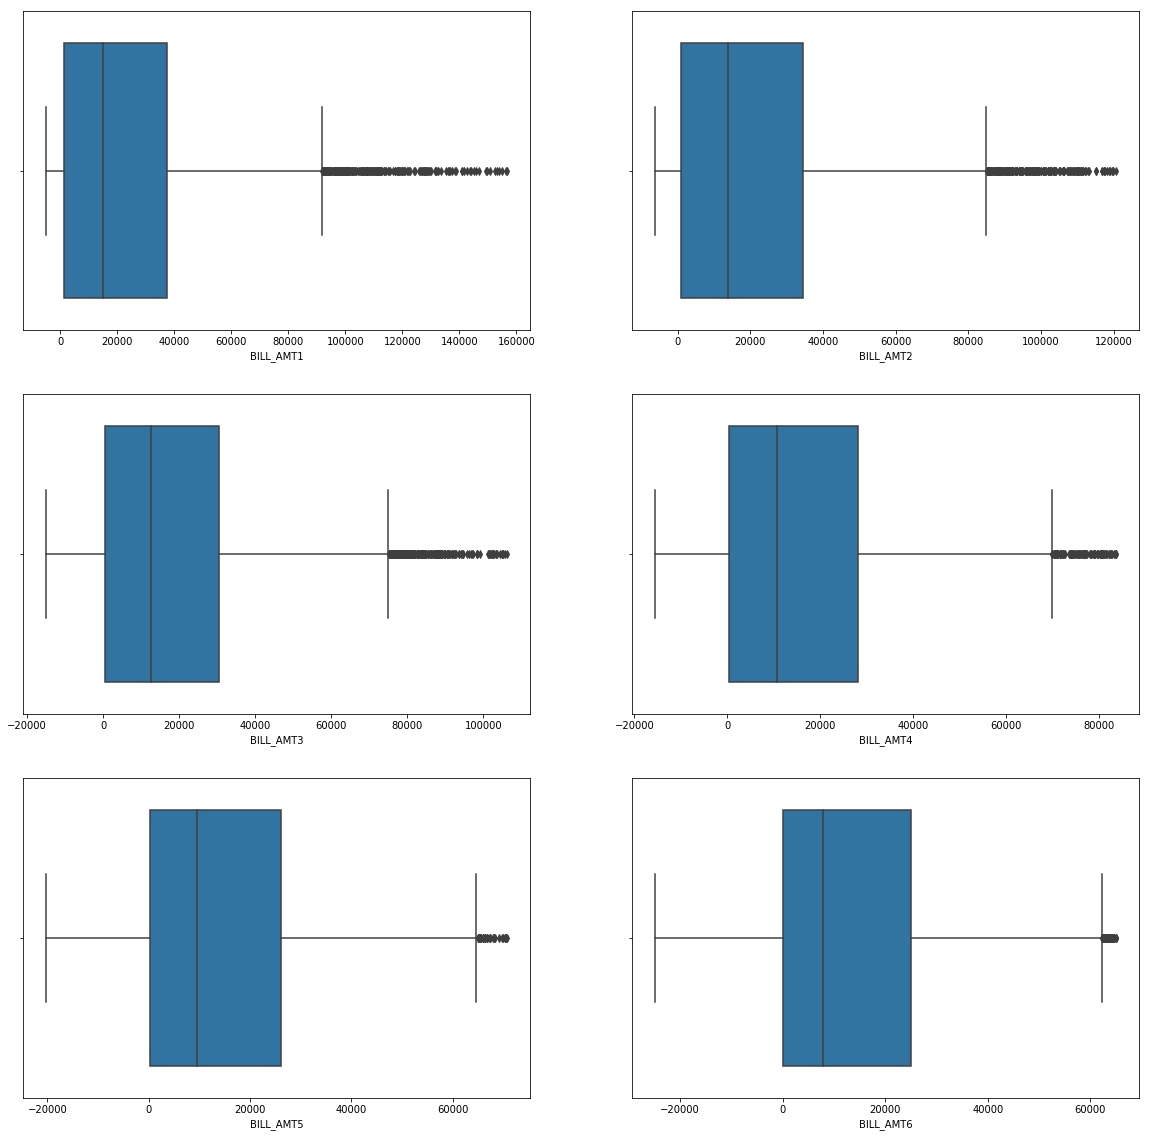

In [17]:
# Distribution analysis feature 3
plt.figure(figsize=(20,20))
for i in range(6):
    idx = "32"+str(i+1)
    plt.subplot(int(idx))
    sns.boxplot(data_cla['BILL_AMT'+str(i+1)])
plt.show()

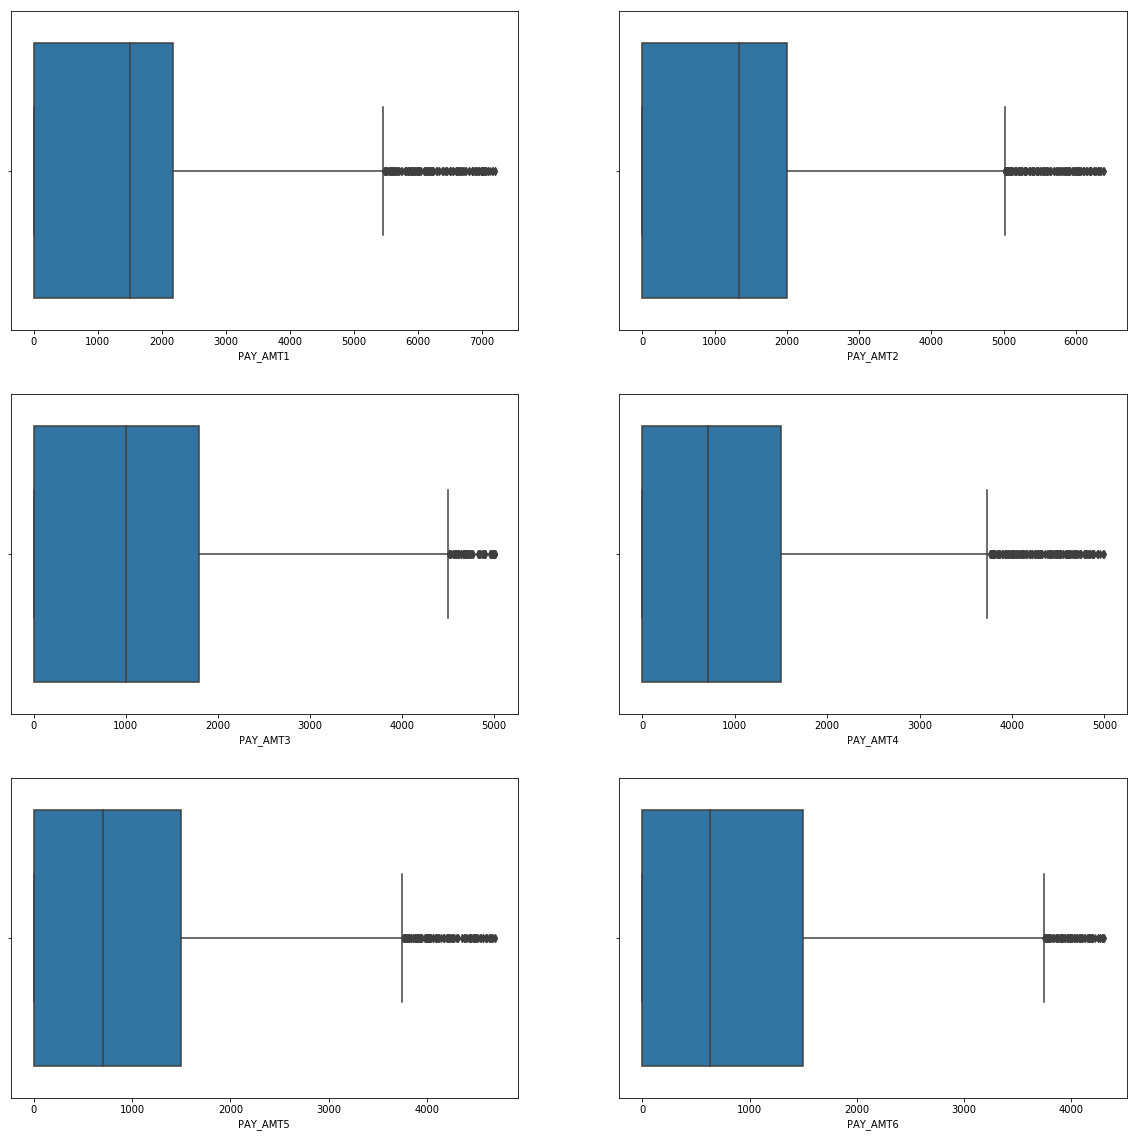

In [18]:
# Distribution analysis feature 4
plt.figure(figsize=(20,20))
for i in range(6):
    idx = "32"+str(i+1)
    plt.subplot(int(idx))
    sns.boxplot(data_cla['PAY_AMT'+str(i+1)])
plt.show()

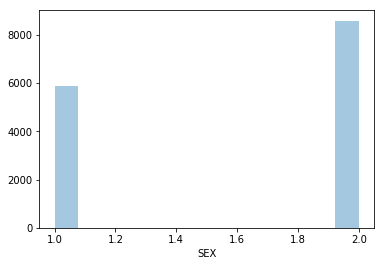

In [19]:
# Distribution analysis feature 5
sns.distplot(data_cla['SEX'], kde = False)
plt.show()

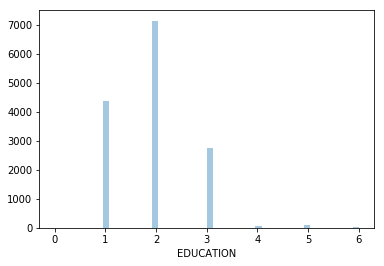

In [20]:
# Distribution analysis feature 6
sns.distplot(data_cla['EDUCATION'], kde = False)
plt.show()

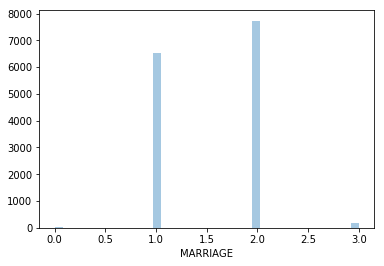

In [21]:
# Distribution analysis feature 7
sns.distplot(data_cla['MARRIAGE'], kde = False)
plt.show()

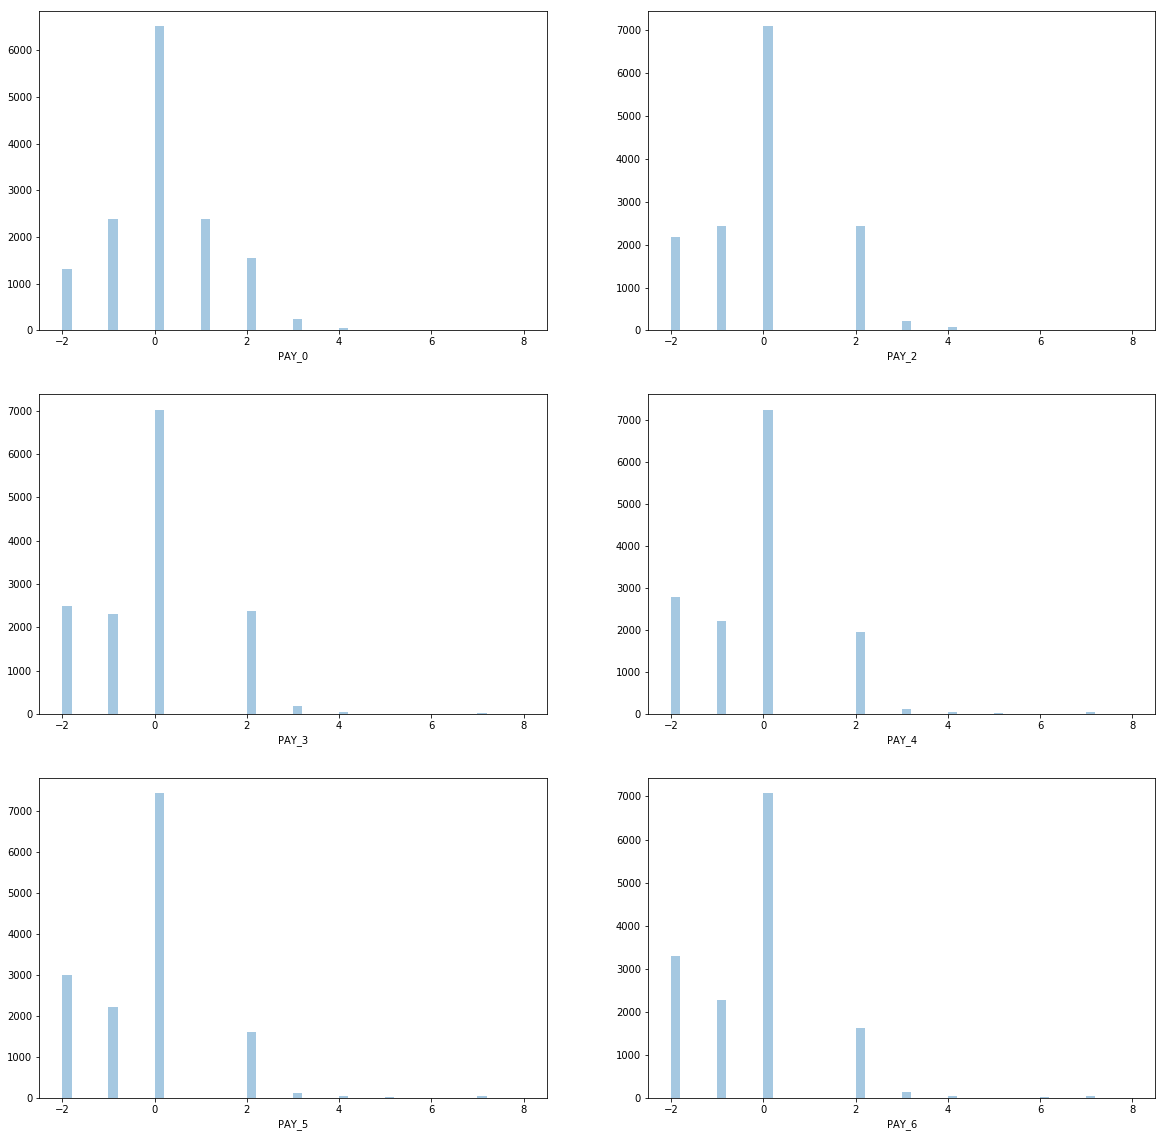

In [22]:
# Distribution analysis feature 4
plt.figure(figsize=(20,20))
for i in range(6):
    if i>0:
        idx = "32"+str(i+1)
        plt.subplot(int(idx))
        sns.distplot(data_cla['PAY_'+str(i+1)], kde = False)
    else:
        idx = "32"+str(i+1)
        plt.subplot(int(idx))
        sns.distplot(data_cla['PAY_'+str(i)], kde = False)
plt.show()

## Feature Selection & Engineering

Based on "Feature correlation analysis" & "Distribution analysis" you can throw away some unnecessary features or even you want to keep all features. Please do some handling about feature selection (selecting necessary features) and state your reason for such handling.

You can do feature engineering to make our dataset clearer such as dividing "date", "month", and "year" or you can add additional data from external source to help your analysis.

<p style='color:red'><b>NB: You can make more than one combination dataset, but please separate them in different variable.</b></p>

In [23]:
# Feature selection handling
data_X = data_cla.copy()
data_X = data_X.drop(['ID', 'default.payment.next.month'], axis = 1)
data_X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
3,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
4,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0


In [24]:
# Feature engineering handling

<hr>

# Data Preprocessing

## Categorical data, numerical data, and target data separation

Please separate categorical data, numerical data, and target data into different variable to make us easier when do preprocessing.

In [25]:
data_cat = data_cla[["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
data_cat.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,2,2,-1,-1,-2,-2
1,2,2,2,-1,2,0,0,0,2
2,2,2,1,0,0,0,0,0,0
3,1,1,2,0,0,0,0,0,0
4,2,2,2,0,-1,-1,0,0,-1


In [26]:
data_num = data_X.copy()
data_num = data_num.drop(data_cat.columns, axis = 1)
data_num.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
3,50000.0,37,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
4,100000.0,23,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0


In [27]:
data_target = data_cla[['default.payment.next.month']]
data_target.head()

,default.payment.next.month
0,1
1,1
2,0
3,0
4,0


## Numerical data normalization

Please normalize our numerical data (if existed) using either "Standard Scaling" or "Min Max Scaling". You can make a new combination dataset by using both method.

In [28]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
def scaleNum(df_num, cols):
    for col in cols:
        df_num[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(data_num[col])),columns=[col])
    return df_num
data_normal_num = scaleNum(data_num,data_num.columns)
data_normal_num.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.02,0.055556,0.054472,0.073739,0.129322,0.156973,0.222471,0.277101,0.000000,0.107926,0.000000,0.000000,0.000000,0.000000
1,0.22,0.092593,0.046858,0.062889,0.145750,0.189922,0.260421,0.313362,0.000000,0.156642,0.199601,0.200321,0.000000,0.464468
2,0.08,0.296296,0.320905,0.429362,0.529942,0.442097,0.540559,0.605653,0.277739,0.316259,0.239521,0.220353,0.227980,0.232234
3,0.08,0.296296,0.428587,0.498987,0.598498,0.352272,0.437968,0.499761,0.347174,0.284305,0.131138,0.200321,0.213265,0.185787
4,0.18,0.037037,0.103723,0.052290,0.128597,0.159198,0.220725,0.283406,0.052770,0.094142,0.000000,0.116386,0.359778,0.358105


## Categorical data encoding

Please encode our categorical data (if existed) using either "One Hot Encoding" or "Label Encoding" based on each data characteristics.

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
def scaleCat(df_cat, cols):
    for col in cols:
        df_cat[col] = pd.DataFrame(label_encoder.fit_transform(pd.DataFrame(data_cat[col])),columns=[col])
    return df_cat
data_normal_cat = scaleCat(data_cat,data_cat.columns)
data_normal_cat.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,2,1,4,4,1,1,0,0
1,1,2,2,1,4,2,2,2,3
2,1,2,1,2,2,2,2,2,2
3,0,1,2,2,2,2,2,2,2
4,1,2,2,2,1,1,2,2,1


## Target data preprocessing

Please preprocess our target data based on whether our target data is numerical or categorical. But if it's categorical, you can label encode it since some machine learning algorithm only receive output data in label encoded form.

In [30]:
label_encoder = LabelEncoder()
def scaleCat(df_cat, cols):
    for col in cols:
        df_cat[col] = pd.DataFrame(label_encoder.fit_transform(pd.DataFrame(data_target[col])),columns=[col])
    return df_cat
data_normal_target = scaleCat(data_target,data_target.columns)
data_normal_target.head()

,default.payment.next.month
0,1
1,1
2,0
3,0
4,0


## Combine all preprocessed data

Please combine preprocessed numerical data, preprocessed categorical data, and preprocessed target data into one variable. Don't forget to combine in different variable if you have more than one combination.

In [31]:
data_fitur = data_normal_num.merge(data_normal_cat, left_index = True, right_index = True)
data_preprocessed = data_fitur.merge(data_normal_target, left_index = True, right_index = True)
data_preprocessed.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,0.02,0.055556,0.054472,0.073739,0.129322,0.156973,0.222471,0.277101,0.000000,0.107926,0.000000,0.000000,0.000000,0.000000,1,2,1,4,4,1,1,0,0,1
1,0.22,0.092593,0.046858,0.062889,0.145750,0.189922,0.260421,0.313362,0.000000,0.156642,0.199601,0.200321,0.000000,0.464468,1,2,2,1,4,2,2,2,3,1
2,0.08,0.296296,0.320905,0.429362,0.529942,0.442097,0.540559,0.605653,0.277739,0.316259,0.239521,0.220353,0.227980,0.232234,1,2,1,2,2,2,2,2,2,0
3,0.08,0.296296,0.428587,0.498987,0.598498,0.352272,0.437968,0.499761,0.347174,0.284305,0.131138,0.200321,0.213265,0.185787,0,1,2,2,2,2,2,2,2,0
4,0.18,0.037037,0.103723,0.052290,0.128597,0.159198,0.220725,0.283406,0.052770,0.094142,0.000000,0.116386,0.359778,0.358105,1,2,2,2,1,1,2,2,1,0


<hr>

# Additional Analysis & Preprocessing (optional)

Please do share your method if you have additional analysis or preprocessing that was out of topics but still related to our dataset. This section and add additional point for this case.

<hr>

# Train Test Split

Please split our dataset into training data and testing data. Do not seperate features data (X) and target data (y) since we will export them after this section.

Please split all other datasets if you have more than one dataset combination.

In [32]:
from sklearn.model_selection import train_test_split

x = data_fitur
y = data_target["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2, random_state = 45)

In [33]:
data_train = X_train.join(pd.DataFrame({'default.payment.next.month':y_train}))
data_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
57,0.02,0.314815,0.141434,0.201904,0.284865,0.340651,0.419393,0.278769,0.235939,0.228697,0.124950,0.350561,0.031990,0.000000,0,2,1,2,2,2,2,2,1,1
3594,0.00,0.092593,0.088774,0.051116,0.151372,0.218692,0.321427,0.379269,0.032079,0.783208,0.598802,0.600962,0.070164,0.078960,1,1,2,2,1,1,2,2,2,0
5153,0.26,0.111111,0.241978,0.327153,0.437523,0.531247,0.674421,0.725578,0.219831,0.532581,0.000000,0.921474,0.000000,0.464468,0,2,2,2,2,2,3,3,3,0
9429,0.32,0.148148,0.348188,0.425493,0.498933,0.588023,0.640052,0.713425,0.291626,0.329731,0.488423,0.240385,0.639795,0.464468,1,2,2,2,2,2,2,2,2,0
12105,0.16,0.425926,0.258096,0.332566,0.458031,0.575928,0.668831,0.742169,0.000000,0.867638,0.399202,0.000000,0.426530,0.696702,0,2,2,3,4,3,3,3,2,0


In [34]:
data_test = X_test.join(pd.DataFrame({'default.payment.next.month':y_test}))
data_test.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
11847,0.42,0.166667,0.594409,0.767089,0.756959,0.830450,0.832032,0.759349,0.555478,0.469925,0.453293,0.402444,0.313286,0.464468,0,2,2,2,2,2,2,2,2,0
866,0.12,0.351852,0.351639,0.368577,0.381727,0.448290,0.546885,0.590230,0.221775,0.220395,0.194012,0.201723,0.219237,0.212030,1,1,1,2,2,2,2,2,2,0
13685,0.04,0.185185,0.207478,0.275572,0.342656,0.427143,0.517272,0.582324,0.249965,0.313283,0.319361,0.200321,0.213265,0.232234,1,2,2,2,2,2,2,2,2,0
1636,0.02,0.037037,0.134908,0.211832,0.288377,0.355373,0.424523,0.485739,0.555478,0.000157,0.129940,0.000000,0.139689,0.151649,1,1,2,2,2,4,3,3,2,0
10177,0.08,0.148148,0.198373,0.268969,0.361928,0.458290,0.557672,0.623634,0.201916,0.232456,0.299002,0.218950,0.242909,0.473525,0,1,2,2,2,2,2,2,2,1


# Exporting Dataset

Please export your dataset into '../data/preprocessed_data/train_data.csv' for training data and '../data/preprocessed_data/test_data.csv' for testing data and keep in mind to exclude dataframe index when exporting.

If you have more than one dataset combination make a counter in folder name such as 'preprocessed_data0', 'preprocessed_data1', 'preprocessed_data2', and keep on...

In [35]:
data_train.to_csv('PreprocessedData/UCI_CC_train.csv', index = False)
data_test.to_csv('PreprocessedData/UCI_CC_test.csv', index = False)